In [1]:
from sklearn import tree, ensemble
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
wine = load_wine()  # 加载内置样本数据

In [2]:
# 决策树和随机森林打分对比
xTrain, xTest, yTrain, yTest = train_test_split(wine.data, wine.target, test_size=0.2)  # 随机划分训练集和测试集
dtc = tree.DecisionTreeClassifier(random_state=0)
rfc = ensemble.RandomForestClassifier(random_state=0, n_estimators=25)  # n_estimators为树的个数
dtc = dtc.fit(xTrain, yTrain)
rfc = rfc.fit(xTrain, yTrain)

score_dtc = dtc.score(xTest, yTest)
score_rfc = rfc.score(xTest, yTest)
print("dTree: {}, forest: {}".format(score_dtc, score_rfc))

dTree: 0.8888888888888888, forest: 0.9444444444444444


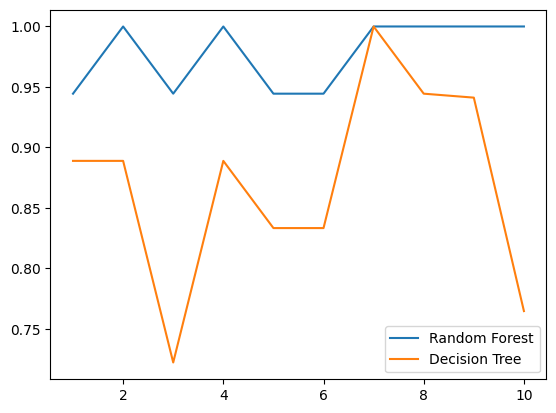

In [3]:
# 交叉验证
rfc_cross = cross_val_score(rfc, wine.data, wine.target, cv=10)  # 样本数据分成10份，9分用于训练，1份用于测试，得到10组对比数据
dtc_cross = cross_val_score(dtc, wine.data, wine.target, cv=10)  # 随机森林的分数一般大于或等于决策树
plt.plot(range(1,11), rfc_cross, label="Random Forest")
plt.plot(range(1,11), dtc_cross, label="Decision Tree")
plt.legend()
plt.show()